# Real Estate Regression
Ames, Iowa dataset
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview


## Problem Statement:  
#### How accurately can we predict house sale prices based on quantitative and qualitative descriptions of its features?

Implementations of the following models:

Linear:  with and without regularization (ways of dealing with high dimensionality)

K-Nearest Neighbors (uses a distance metric to look at nearest neighbors to make decision)

Extreme Gradient Boosting (an optimized ensemble tree method, builds and learns sequentially, making adjustments based on residuals of previous weak learner)  


In [16]:
import pandas as pd
import numpy as np
import timeit
from scipy import stats

pd.set_option('display.max_columns', None)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [18]:
df = pd.read_csv('train.csv')

In [19]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
#Create response variable
y = df["SalePrice"]

In [21]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

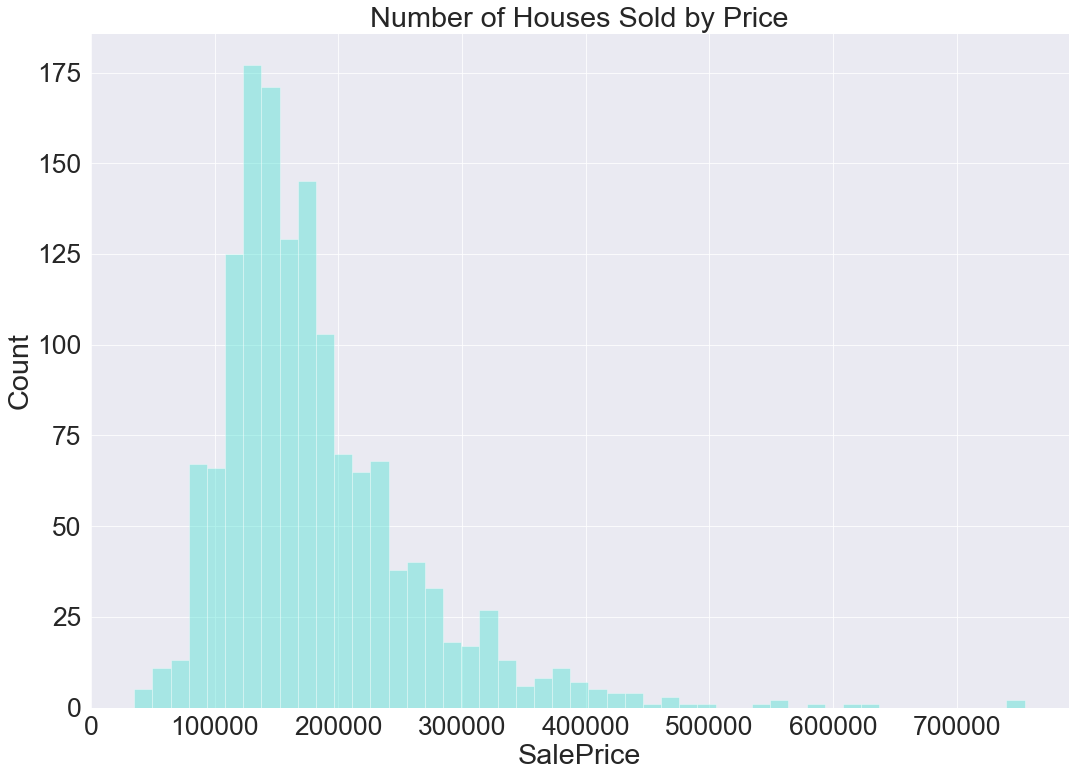

In [60]:
#Plot distribution of y
sns.set_context("paper", font_scale=3) 
#sns.set_color("aquamarine")
sns.distplot(y, kde=False, rug=False, color="turquoise");
plt.title("Number of Houses Sold by Price")
plt.ylabel("Count")
sns.set(rc={'figure.figsize':(1.5*11.7,1.5*8.27)})

In [63]:
X[X["YrSold"]==2010]["MoSold"].max()

7

In [23]:
X = df.drop(columns=["SalePrice", "Id"])

In [24]:
#find numeric columns
numeric = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010


In [25]:
df[numeric]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010


## Check correlations in Numeric Columns

In [26]:
corr = df[numeric].corr()
corr.style.background_gradient(cmap='coolwarm')

## Preprocess Data

In [37]:
df1_processed = pd.read_csv('df1_numcat.csv')

df1_processed.describe()

df1_processed.head()

df1_processed.drop(columns="Id", inplace=True)

df1_processed.columns[df1_processed.isnull().any()]
#train[null_columns].isnull().sum()

#replace nan with medians
df1_processed["LotFrontage"] = df1_processed["LotFrontage"].fillna(df1_processed["LotFrontage"].median())
df1_processed["MasVnrArea"] = df1_processed["MasVnrArea"].fillna(df1_processed["MasVnrArea"].median())
df1_processed["GarageYrBlt"] = df1_processed["GarageYrBlt"].fillna(df1_processed["GarageYrBlt"].median())

#scale numeric variables
numeric = X.select_dtypes(include=['int64', 'float64']).columns


df1_processed[numeric]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1_processed[numeric] = scaler.fit_transform(df1_processed[numeric])

### Split Data into Train, Test

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#for categorical analysis
X_train, X_test, y_train, y_test = train_test_split(df1_processed, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape, y_train.shape

((1168, 288), (1168,))

In [32]:
X_train.to_csv('rX_train.csv', index=False)

In [33]:
y_train.to_csv('ry_train.csv', index=False)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


### Split Data into Train, Valid

In [42]:
#split again
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=50)

In [60]:
X_train.shape, y_train.shape

((934, 288), (934,))

## Implement Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [62]:
import time

start_time = time.time()

reg = LinearRegression().fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))


--- 0.07539200782775879 seconds ---


In [63]:
#Evaluate Model
preds = reg.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, preds))

rmse

174444175487293.88

## Implement SGD Regressor for Linear Regression

In [64]:
from sklearn.linear_model import SGDRegressor

reg2 = SGDRegressor(max_iter=1000, tol=1e-3)

In [68]:
start_time = time.time()

reg2.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))


NameError: name 'time' is not defined

#### Evaluate Model

In [67]:
#Evaluate Model
preds = reg2.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, preds))

rmse

29444.234132209705

## Try Linear Regression on Reduced X_train, X_valid (columns > 50% null dropped)

In [66]:
## Filter-based Feature Selection:  Large Null columns?  Create X_train2, X_valid2, X_test2

df.loc[:, df.isnull().sum()>730]

#delete relevant columns from X_train, X_test and X_valid

X_train.head()

X_train2 = X_train.drop(columns=["Alley_Grvl", "Alley_Pave", "PoolQC_Fa", "PoolQC_Gd", "Fence_GdPrv", "Fence_GdWo", "Fence_MnPrv", 
                     "Fence_MnWw", "MiscFeature_Gar2", "MiscFeature_Othr", "MiscFeature_Shed", "MiscFeature_TenC"])

X_valid2 = X_valid.drop(columns=["Alley_Grvl", "Alley_Pave", "PoolQC_Fa", "PoolQC_Gd", "Fence_GdPrv", "Fence_GdWo", "Fence_MnPrv", 
                     "Fence_MnWw", "MiscFeature_Gar2", "MiscFeature_Othr", "MiscFeature_Shed", "MiscFeature_TenC"])

X_test2 = X_test.drop(columns=["Alley_Grvl", "Alley_Pave", "PoolQC_Fa", "PoolQC_Gd", "Fence_GdPrv", "Fence_GdWo", "Fence_MnPrv", 
                     "Fence_MnWw", "MiscFeature_Gar2", "MiscFeature_Othr", "MiscFeature_Shed", "MiscFeature_TenC"])


In [67]:
reg2.fit(X_train2, y_train)

NameError: name 'reg2' is not defined

In [90]:
#Evaluate Model
preds = reg2.predict(X_valid2)

rmse = np.sqrt(mean_squared_error(y_valid, preds))

rmse

29007.06926397911

## Use Sklearn's implementation of KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [92]:
#Create a model

KNN_Classifier = KNeighborsClassifier(n_neighbors = 20, p = 288, metric='minkowski')

In [93]:
#Train the model
KNN_Classifier.fit(X_train, y_train)
#Let's predict the classes for test data
pred_test = KNN_Classifier.predict(X_test.iloc[:5, :])

In [94]:
pred_test

array([140000, 290000, 110000, 120000, 315000])

### Evaluate Model

In [95]:
preds = KNN_Classifier.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, preds))

In [96]:
rmse

66795.51572574597

### Grid Search for best number of neighbors

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

In [56]:
knn = KNeighborsClassifier(metric='minkowski')

pipe = Pipeline(steps=[('knn', knn)])

n_neighbors = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 25, 30, 35]
p = [1, 2, 288]
 
parameters = dict(knn__n_neighbors=n_neighbors,
                      knn__p=p)
    
clf = GridSearchCV(pipe, parameters)


In [57]:
clf.fit(X_train, y_train)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'knn__n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                              20, 25, 30, 35],
                         'knn__p': [1, 2, 288]},
             pre_disp

In [58]:
print(clf.best_estimator_.get_params()['knn'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=288,
                     weights='uniform')


#### Evaluate best KNN

In [47]:
#define best model
KNN_Classifier = KNeighborsClassifier(n_neighbors = 30, p = 288, metric='minkowski')

#fit best model
KNN_Classifier.fit(X_train, y_train)

#evaluate
preds = KNN_Classifier.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, preds))
rmse

63397.19402378739

### Try grid search for KNN with column filtered X_train2, X_valid2

In [105]:
clf.fit(X_train2, y_train)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'knn__n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                              20, 25, 30, 35],
                         'knn__p': [1, 2, 288]},
             pre_disp

In [106]:
print(clf.best_estimator_.get_params()['knn'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=288,
                     weights='uniform')


In [107]:
#evaluate:  Note, did worse
preds = clf.predict(X_valid2)
rmse = np.sqrt(mean_squared_error(y_valid, preds))
rmse

64273.44099559732

## Implement XG Boosting in Sklearn

In [49]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [50]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [51]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 81128.408135


## Using XGBoost with Cross-validation

In [52]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [53]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,179186.078125,1832.412124,179477.354167,3848.794480
1,162580.552083,1672.825377,163146.687500,3450.937661
2,147477.734375,1458.244060,148294.947917,3125.538391
3,133819.911458,1290.229171,134934.447917,2870.728292
4,121666.145833,1151.472590,123033.067708,2480.241969


### Grid Search for XGBoost

In [54]:
#xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
          #      max_depth = 5, alpha = 10, n_estimators = 10)



gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
'n_estimators': [50, 100, 200],
'subsample': [0.3, 0.5, 0.9],
'max_depth' : [2, 5, 10, 20]}
gbm = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,
scoring='neg_mean_squared_error', cv=4, verbose=1)
grid_mse.fit(X_train, y_train)
print("Best parameters found: ",grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

NameError: name 'GridSearchCV' is not defined

### Evaluate best XGBoost Model

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth=2, alpha = 10, n_estimators = 200, subsample=0.9)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

In [ ]:
# Evaluate Model
preds = clf.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, preds))
rmse

## LASSO Regression

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=10) 

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
# Evaluate Model
preds = clf.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, preds))
rmse

## Try Feature Selection Methods

#### Filtered Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
transf = SelectKBest(chi2, k=200)
X_new = transf.fit_transform(X_train, y_train)

In [ ]:
transf.transform(X_valid)

In [ ]:
#Train the model
clf = KNN_Classifier.fit(X_new, y_train)
#Let's predict the classes for test data
preds = clf.predict(transf.transform(X_valid))

rmse = np.sqrt(mean_squared_error(y_valid, preds))
rmse

## Lasso Regression on new X_train df

In [ ]:
clf = linear_model.Lasso(alpha=10) #10 24 074
clf.fit(X_train, y_train)

In [ ]:
# Evaluate Model
preds = clf.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, preds))
rmse

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10)
Xt_pca = pca.fit_transform(X_train)

In [ ]:
Xt_pca

In [ ]:
Xv_pca = pca.transform(X_valid)

In [ ]:
pc_df = pd.DataFrame(data = Xt_pca , 
        columns = ['PC1', 'PC2','PC3','PC4', 'PC5', 'PC6', 'PC7','PC8','PC9', 'PC10'])
pc_df['Cluster'] = y_train
pc_df.head()

In [ ]:
pca.explained_variance_ratio_


In [ ]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7','PC8','PC9', 'PC10']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");
plt.title("Scree Plot")

#### Choose 3 components

In [ ]:
# Fit and transform Xtrain
pca = PCA(n_components=10)
Xtr_pca = pca.fit_transform(X_train)

In [ ]:
#transform valid and test
Xte_pca = pca.fit_transform(X_test)
Xv_pca = pca.fit_transform(X_valid)

## Try Linear Regression on PCA Training Set


In [ ]:
#Try linear regression
reg3 = SGDRegressor(max_iter=1000, tol=1e-3)

reg3.fit(Xtr_pca, y_train)

preds = reg3.predict(Xv_pca)

rmse = np.sqrt(mean_squared_error(y_valid, preds))

rmse

In [ ]:
preds = reg3.predict(Xte_pca)

rmse = np.sqrt(mean_squared_error(y_test, preds))

rmse

### Try XGBoost

In [ ]:
data_dmatrix = xgb.DMatrix(data=Xtr_pca,label=y_train)

In [ ]:
gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
'n_estimators': [50, 100, 200],
'subsample': [0.3, 0.5, 0.9],
'max_depth' : [2, 5, 10, 20]}
gbm = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,
scoring='neg_mean_squared_error', cv=4, verbose=1)
grid_mse.fit(X_train, y_train)
print("Best parameters found: ",grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

# Try Dropping Categoricals with Large amounts of classes

In [ ]:
MSZoning         
Neighborhood    
Exterior1st      
Exterior2nd     
Functional        
SaleType

In [ ]:
columns_list = ['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM','Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Exterior1st_AsbShng',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsbShng',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'Functional_Maj1',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Sev',
 'Functional_Typ',
 'SaleType_COD',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_Oth',
 'SaleType_WD']

In [ ]:
#drop these from X_train:  MSZoning, Neighborhood, Exterior1st, Exterior2nd , Functional, SaleType

X_train3 = df1_processed.drop(columns = columns_list)

In [ ]:
X_train3 = X_train.drop(columns = columns_list)
 

In [ ]:
X_valid3 = X_valid.drop(columns = columns_list)
 

In [ ]:
X_test3 = X_test.drop(columns = columns_list)
 

In [ ]:
len(df1_processed.columns.tolist())
# cut about 70 columns

## Try KNN on reduced set

In [ ]:
knn = KNeighborsClassifier(metric='minkowski')

pipe = Pipeline(steps=[('knn', knn)])

n_neighbors = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 25, 30, 35]
p = [1, 2, 288]
 
parameters = dict(knn__n_neighbors=n_neighbors,
                      knn__p=p)
    
clf = GridSearchCV(pipe, parameters)


In [ ]:
clf.fit(X_train3, y_train)
print(clf.best_estimator_.get_params()['knn'])

In [ ]:
#define best model
KNN_Classifier = KNeighborsClassifier(n_neighbors = 35, p = 1, metric='minkowski')

#fit best model
KNN_Classifier.fit(X_train3, y_train)

#evaluate
preds = KNN_Classifier.predict(X_valid3)
rmse = np.sqrt(mean_squared_error(y_valid, preds))
rmse

## Dictionary and Dataframe of Results

In [11]:
d = {'Model Name': ["Linear", "Ridge", "LASSO","Filt. Linear", "KNN", "Filt. KNN", "XGBoost", "LinearPCA","XGBoostPCA"], 
     'RMSE': [29503, 27146, 22826, 28985, 62722, 64273, 31762, 64752, 30785]}
df = pd.DataFrame(data=d)

In [12]:
df.sort_values(by=['RMSE'], ascending=True, inplace=True)

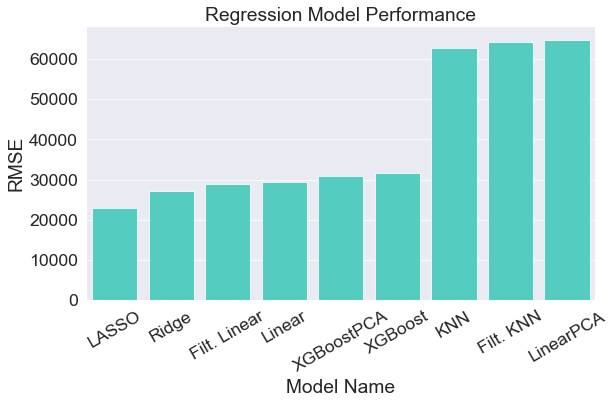

In [14]:
#plt.figure(figsize=(30,10))
sns.set_context("paper", font_scale=2) 
g = sns.catplot(x="Model Name", y="RMSE", kind="bar", color="turquoise", data=df);
plt.title("Regression Model Performance")
g.set_xticklabels(rotation=30)
g.fig.set_figwidth(12)
#sns.set(rc={'figure.figsize':(3*11.7,3*8.27)})

In [69]:
X_train2.to_csv("X_train2.csv", index=False)

In [70]:
X_valid2.to_csv("X_train2.csv", index=False)